<a href="https://colab.research.google.com/github/deva41103/PRODIGY_ML_04/blob/main/Deva4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(42)
tf.random.set_seed(42)

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

def load_and_preprocess_data(data_dir):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator

def create_model(num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

data_dir = '/content/drive/MyDrive/00'
train_generator, validation_generator = load_and_preprocess_data(data_dir)

num_classes = len(train_generator.class_indices)

model = create_model(num_classes)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

model.save('hand_gesture_model.h5')

Found 1608 images belonging to 10 classes.
Found 402 images belonging to 10 classes.
Epoch 1/10
51/51 [==============================] - 546s 11s/step - loss: 0.3527 - accuracy: 0.9024 - val_loss: 0.8404 - val_accuracy: 0.8184
Epoch 2/10
51/51 [==============================] - 72s 1s/step - loss: 1.6491e-04 - accuracy: 1.0000 - val_loss: 0.7851 - val_accuracy: 0.8458
Epoch 3/10
51/51 [==============================] - 69s 1s/step - loss: 1.5389e-05 - accuracy: 1.0000 - val_loss: 0.8012 - val_accuracy: 0.8483
Epoch 4/10
51/51 [==============================] - 71s 1s/step - loss: 5.9976e-06 - accuracy: 1.0000 - val_loss: 0.8212 - val_accuracy: 0.8483
Epoch 5/10
51/51 [==============================] - 67s 1s/step - loss: 2.8010e-06 - accuracy: 1.0000 - val_loss: 0.8423 - val_accuracy: 0.8483
Epoch 6/10
51/51 [==============================] - 68s 1s/step - loss: 1.5525e-06 - accuracy: 1.0000 - val_loss: 0.8655 - val_accuracy: 0.8483
Epoch 7/10
51/51 [==============================] - 7

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 145ms/step


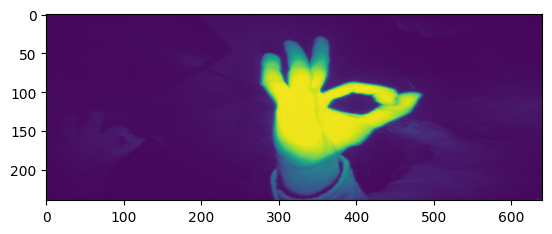

The predicted hand gesture is: 07_ok


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from skimage.io import imread
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('hand_gesture_model.h5')

def predict_hand_gesture(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    class_labels = list(train_generator.class_indices.keys())
    predicted_gesture = class_labels[predicted_class]

    return predicted_gesture

image_path_to_predict = '/content/drive/MyDrive/00/07_ok/frame_00_07_0017.png'
predicted_gesture = predict_hand_gesture(image_path_to_predict)

img=imread(image_path_to_predict)
plt.imshow(img)
plt.show()

print(f"The predicted hand gesture is: {predicted_gesture}")